In [1]:
###############################################################
###### Auther: Asiri Amal K                                 ###
###### Description : Car Price Prediction model in ML       ###
###############################################################

In [377]:
#Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [378]:
car = pd.read_csv("DatasetADs.csv")

# Data Mining and Preprocessing

In [379]:
car.describe()

,Mileage_Min,Mileage_Max,price,Year,min_prix_neuf,max_prix_neuf,Age
count,32395.000000,32395.000000,3.239500e+04,32395.000000,3.239500e+04,3.239500e+04,32395.000000
mean,116592.066677,131076.174070,1.054981e+05,2010.798796,2.157886e+05,2.907133e+05,9.201204
std,75722.653802,92740.841965,8.690894e+04,4.373741,1.449547e+05,2.233345e+05,4.373741
min,0.000000,4999.000000,1.050000e+04,2001.000000,9.790000e+04,9.990000e+04,1.000000
25%,60000.000000,64999.000000,6.200000e+04,2008.000000,1.247000e+05,1.711000e+05,6.000000
50%,110000.000000,119999.000000,8.600000e+04,2011.000000,1.610000e+05,2.199000e+05,9.000000
75%,170000.000000,179999.000000,1.200000e+05,2014.000000,2.700000e+05,3.589000e+05,12.000000
max,500000.000000,1000000.000000,9.100000e+06,2019.000000,1.304000e+06,2.660000e+06,19.000000


In [380]:
car.head()

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
0,Casablanca,35000,39999,295000,GIULIA,Alfa Romeo,4/3/2019,Diesel,2017,Italie,369900,494900,3
1,Casablanca,10000,14999,450000,GIULIA,Alfa Romeo,7/7/2019,Diesel,2019,Italie,369900,494900,1
2,Mohammedia,130000,139999,102000,Giulietta,Alfa Romeo,7/27/2019,Essence,2010,Italie,229900,279900,10
3,Mohammedia,130000,139999,102000,Giulietta,Alfa Romeo,7/27/2019,Essence,2010,Italie,229900,279900,10
4,Casablanca,200000,249999,100000,Giulietta,Alfa Romeo,7/8/2019,Diesel,2011,Italie,229900,279900,9


## Dataset has 13 classes

In [381]:
print(len(car.columns))
car.columns

13


Index(['City', 'Mileage_Min', 'Mileage_Max', 'price', 'serie', 'Make',
       'Date_ads', 'Fuel', 'Year', 'Country_Make', 'min_prix_neuf',
       'max_prix_neuf', 'Age'],
      dtype='object')

In [382]:
car.dtypes

City             object
Mileage_Min       int64
Mileage_Max       int64
price             int64
serie            object
Make             object
Date_ads         object
Fuel             object
Year              int64
Country_Make     object
min_prix_neuf     int64
max_prix_neuf     int64
Age               int64
dtype: object

#### No missing values in the dataset

In [383]:
car.isnull().sum()

City             0
Mileage_Min      0
Mileage_Max      0
price            0
serie            0
Make             0
Date_ads         0
Fuel             0
Year             0
Country_Make     0
min_prix_neuf    0
max_prix_neuf    0
Age              0
dtype: int64

## Categorical classes - 6
1. City
2. serie
3. Make
4. Date_ads
5. Fuel
6. Country_Make

In [384]:
cat_classes = car.select_dtypes(include=object).columns
num_classes = car.select_dtypes(include=np.int64).columns
print(len(cat_classes))
print(cat_classes)
print(num_classes)

#Sample Categorical values
car.select_dtypes(include=object).head()

6
Index(['City', 'serie', 'Make', 'Date_ads', 'Fuel', 'Country_Make'], dtype='object')
Index(['Mileage_Min', 'Mileage_Max', 'price', 'Year', 'min_prix_neuf',
       'max_prix_neuf', 'Age'],
      dtype='object')


,City,serie,Make,Date_ads,Fuel,Country_Make
0,Casablanca,GIULIA,Alfa Romeo,4/3/2019,Diesel,Italie
1,Casablanca,GIULIA,Alfa Romeo,7/7/2019,Diesel,Italie
2,Mohammedia,Giulietta,Alfa Romeo,7/27/2019,Essence,Italie
3,Mohammedia,Giulietta,Alfa Romeo,7/27/2019,Essence,Italie
4,Casablanca,Giulietta,Alfa Romeo,7/8/2019,Diesel,Italie


##### CIty - Class

* There are 249 Cities in this category,
* Maximum number of vehicles can be found in 'Casablanca' and it is 10168
* The second one is 'Rabat' but it does have lesser than half of vehicles in 'Casablanca' and it is 3141

Class Category will not give valuable information for the machine learning predictions  because of the "Curse of Cardinality" (high dimentionality in feature space).

In [385]:
print(car['City'].value_counts().shape)
car['City'].value_counts()

(249,)


Casablanca                 10168
Rabat                       3141
Marrakech                   2268
Tanger                      2217
Fès                         1666
Agadir                      1657
Salé                        1111
Meknès                      1057
Kénitra                     1000
El Jadida                    673
Tétouan                      670
Mohammedia                   568
Oujda                        489
Temara                       416
Safi                         366
Béni Mellal                  361
Nador                        314
Khouribga                    255
Settat                       225
Taza                         211
Berrechid                    197
Laâyoune                     172
Ouarzazate                   152
Larache                      115
Khénifra                     110
Berkane                      107
Errachidia                   105
Khemisset                     98
Guelmim                       77
Dakhla                        74
          

In [386]:
# Dropping city
cars = car.drop("City", axis=1)

### serie - Class

* Highly Skewed

In [387]:
print(car['serie'].value_counts().shape)
car['serie'].value_counts()

(181,)


Logan                2858
Kangoo               1962
Clio                 1796
Partner              1074
Fiesta               1055
Berlingo              977
Picanto               822
Sandero               802
Megane                781
Polo                  744
i 10                  727
Duster                689
Dokker                674
Passat                661
Accent                598
Corolla               538
Classe C              533
Punto                 504
308                   424
Touran                422
Astra                 420
Tiguan                384
Santa Fe              363
GOLF 7                361
Doblo                 350
Accord                349
Caddy                 346
Touareg               345
208                   330
C3                    312
                     ... 
Classe GLC              8
Velar                   8
Renegade                7
XJ                      7
911 Carrera             6
Classe CL               6
TT                      6
X4          

### Make Class

* 29 Categories 
* Highly Skewed dataset

Since the dataset is highly skewed we cannot most probably high count values like "Rrenoult", "Dacia", "Volkswagon" will be give more accurate results but "Lexus", "Mini", "Jaguar" like lesser counts will not.

In general make will be a huge impact for a car second hand market so it is better to use this category for the predictions, The accuracy will increase with the size of the dataset

In [388]:
print(car['Make'].value_counts().shape)
car['Make'].value_counts()

(29,)


Renault          5239
Dacia            5094
Volkswagen       3610
Peugeot          2662
Hyundai          2246
Citroen          1748
Ford             1371
Fiat             1217
Kia              1161
Mercedes-Benz    1111
Toyota           1091
Audi             1034
BMW               876
Honda             876
Opel              712
Nissan            501
Seat              431
Land Rover        306
Skoda             243
Jeep              151
Ssangyong         136
Mitsubishi        123
Volvo             119
Alfa Romeo         99
Porsche            94
Mazda              70
Jaguar             44
mini               27
Lexus               3
Name: Make, dtype: int64

### Date_ads - Class
* 218 Occurences 
* No value at all for the prediction

In [389]:
print(car['Date_ads'].value_counts().shape)
car['Date_ads'].value_counts()

(218,)


9/15/2019     1256
9/14/2019      922
9/13/2019      786
9/12/2019      688
9/10/2019      644
9/11/2019      638
9/16/2019      613
9/9/2019       569
9/8/2019       488
9/2/2019       485
9/7/2019       475
9/3/2019       474
9/5/2019       444
7/30/2019      441
9/1/2019       426
9/6/2019       419
8/27/2019      414
6/21/2019      409
9/4/2019       409
8/26/2019      406
7/10/2019      397
8/28/2019      394
6/25/2019      392
8/29/2019      391
6/26/2019      385
7/15/2019      381
8/31/2019      371
7/3/2019       371
7/9/2019       371
7/11/2019      365
              ... 
11/15/2018       1
3/6/2019         1
1/17/2019        1
2/19/2019        1
4/22/2019        1
3/30/2019        1
2/21/2019        1
3/13/2019        1
3/8/2019         1
3/4/2019         1
4/1/2019         1
11/21/2018       1
11/18/2018       1
2/14/2019        1
2/11/2019        1
12/25/2018       1
1/18/2019        1
2/16/2019        1
3/19/2019        1
3/10/2019        1
1/26/2019        1
5/7/2019    

In [390]:
# Drop Date_ads class
cars = cars.drop("Date_ads", axis=1)

### Fuel - Class

* This will be a valuable information

In [391]:
print(car['Fuel'].value_counts().shape)
car['Fuel'].value_counts()

(5,)


Diesel        26033
Essence        6321
Hybride          24
Electrique       14
LPG               3
Name: Fuel, dtype: int64

### Country_Make - Class

* Valuable Information

In [392]:
print(car['Country_Make'].value_counts().shape)
car['Country_Make'].value_counts()

(11,)


France          9649
Allemagne       7464
Roumanie        5094
Corée du sud    3543
Japon           2664
USA             1522
Italie          1316
Espagne          431
Royaume-Uni      350
Tchéquie         243
Suède            119
Name: Country_Make, dtype: int64

### Droped Features : Date_ads, City
### Useful Features: serie, Make, Fuel, Country_Make

## Numaric Classes - 7
1. Age
2. Year
3. Mileage_Min
4. Mileage_Max
5. min_prix_neuf
6. max_prix_neuf
7. Price

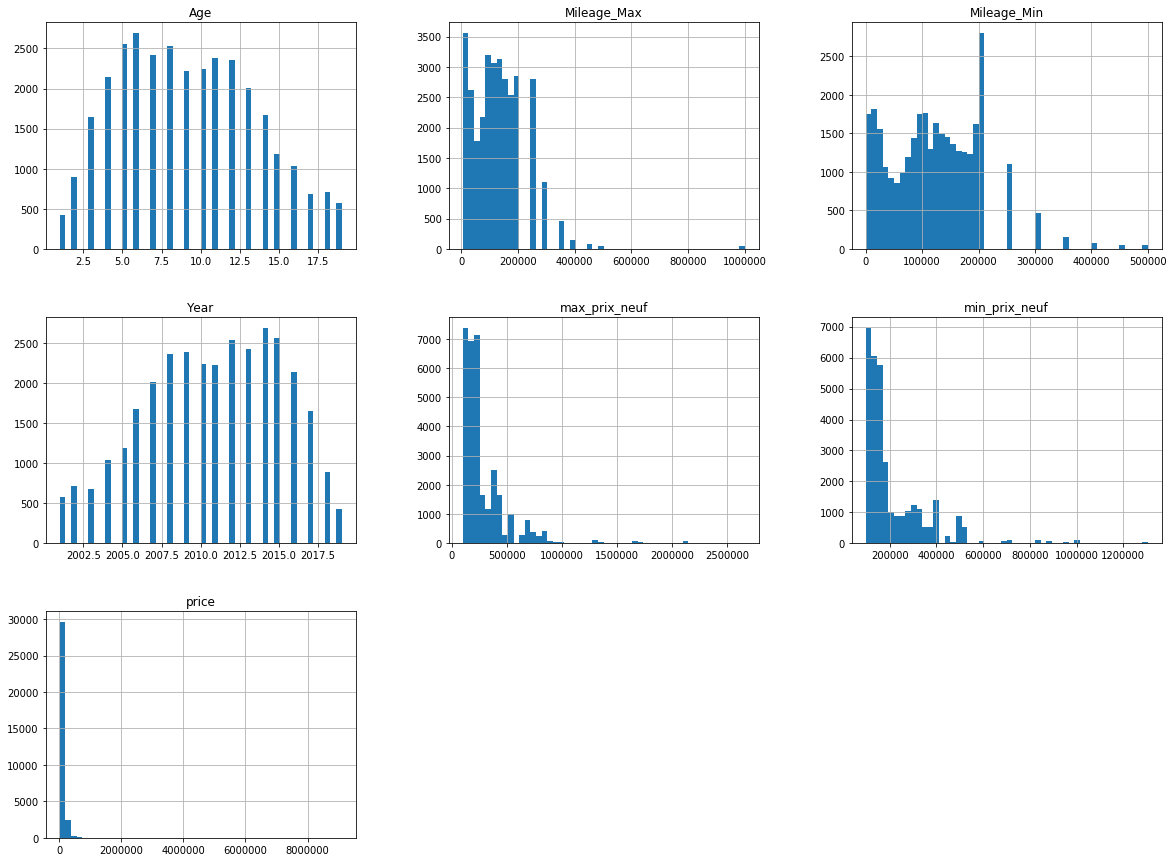

In [393]:
car.hist(bins=50, figsize=(20,15))
plt.show()

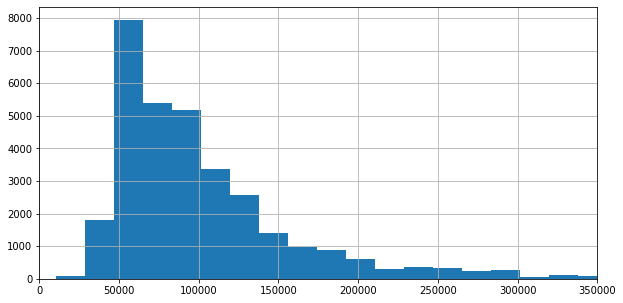

In [394]:
car['price'].hist(bins=500, figsize=(10,5))
plt.xlim(0, 350000)
plt.show()

In [395]:
max(car['price'])

9100000

## Year Represents the same data of Age

[]

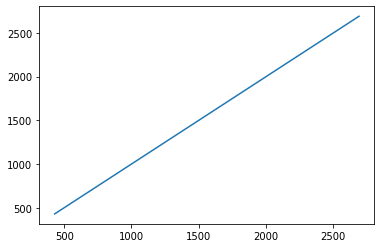

In [396]:
plt.plot(car['Age'].value_counts(ascending=True), car['Year'].value_counts(ascending=True))
plt.plot()
# print(car['Age'].value_counts(ascending=True))
# print(car['Year'].value_counts(ascending=True))

## Notice a few things in these histograms:

1. Year and Age represents the same information so further calculation it will only use the Age
2. Min-Max Milage, Min-Max Price, and Price has Outliers that should be removed 
3. These attributes have very different scales. 
4. Finally, many histograms are tail heavy: they extend much farther to the right of
    the median than to the left. This may make it a bit harder for some Machine
    Learning algorithms to detect patterns. We will try transforming these attributes
    later on to have more bell-shaped distributions

## Car Price has huge outliers

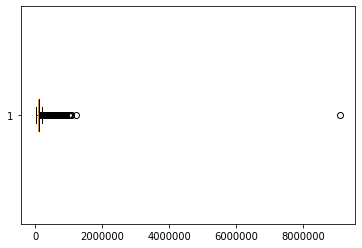

In [397]:
plt.boxplot(cars['price'], vert = False)
plt.show()

## Values Greater than 500,000

In [398]:
car.where(car['price'] > 500000).dropna()

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
397,Rabat,5000.0,9999.0,510000.0,A3,Audi,7/13/2019,Diesel,2019.0,Allemagne,305000.0,445000.0,1.0
828,Casablanca,40000.0,44999.0,890000.0,A8,Audi,7/10/2019,Diesel,2018.0,Allemagne,1250000.0,1450000.0,2.0
829,Béni Mellal,0.0,4999.0,1000000.0,A8,Audi,7/9/2019,Diesel,2019.0,Allemagne,1250000.0,1450000.0,1.0
1024,Rabat,60000.0,64999.0,510000.0,Q5,Audi,9/12/2019,Diesel,2016.0,Allemagne,499000.0,659000.0,4.0
1041,Marrakech,5000.0,9999.0,620000.0,Q5,Audi,9/13/2019,Diesel,2018.0,Allemagne,499000.0,659000.0,2.0
1116,Casablanca,35000.0,39999.0,630000.0,Q7,Audi,9/16/2019,Diesel,2016.0,Allemagne,678000.0,918000.0,4.0
1117,Casablanca,35000.0,39999.0,630000.0,Q7,Audi,9/16/2019,Diesel,2016.0,Allemagne,678000.0,918000.0,4.0
1118,Casablanca,40000.0,44999.0,620000.0,Q7,Audi,9/15/2019,Diesel,2016.0,Allemagne,678000.0,918000.0,4.0
1119,Casablanca,110000.0,119999.0,660000.0,Q7,Audi,7/15/2019,Diesel,2016.0,Allemagne,678000.0,918000.0,4.0
1120,Rabat,30000.0,34999.0,600000.0,Q7,Audi,7/23/2019,Diesel,2016.0,Allemagne,678000.0,918000.0,4.0


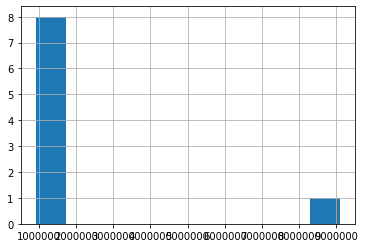

In [399]:
m_price = car.where(car['price'] > 900000).dropna()
m_price['price'].hist()
plt.show()

## Check the correlations

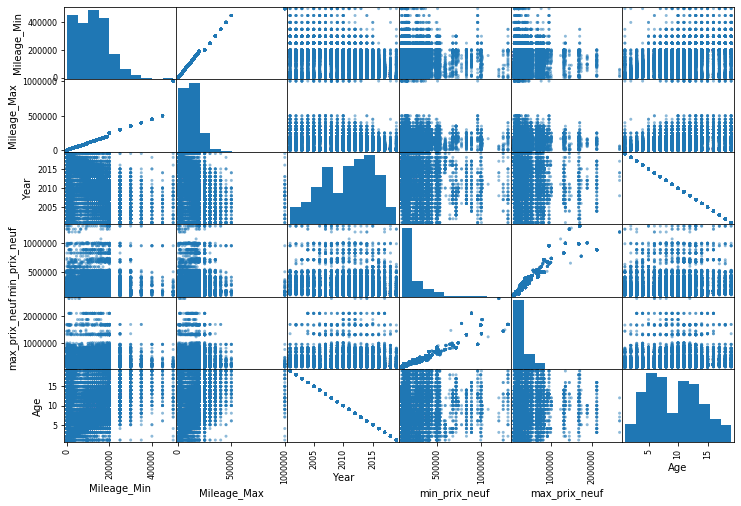

In [400]:
from pandas.plotting import scatter_matrix
attributes = ['Mileage_Min', 'Mileage_Max', 'Year', 'min_prix_neuf','max_prix_neuf', 'Age']
scatter_matrix(car[attributes], figsize=(12, 8))
plt.show()

In [401]:
np.array(num_classes)

array(['Mileage_Min', 'Mileage_Max', 'price', 'Year', 'min_prix_neuf',
       'max_prix_neuf', 'Age'], dtype=object)

#### Note:
1. As I mentioned above age and year has a 1 correlation magnitude so year can be removed
2. min_prix_neuf(min price) and max_prix_neuf(max_price) has a closely 1 magnitude correlation so it can be change to 
average price
3.  mileage min and max has a closely 1 magnitude correlation so it can be change to average mileage


In [402]:
## Dropping year
cars = cars.drop("Year", axis=1)
cars.describe()

,Mileage_Min,Mileage_Max,price,min_prix_neuf,max_prix_neuf,Age
count,32395.000000,32395.000000,3.239500e+04,3.239500e+04,3.239500e+04,32395.000000
mean,116592.066677,131076.174070,1.054981e+05,2.157886e+05,2.907133e+05,9.201204
std,75722.653802,92740.841965,8.690894e+04,1.449547e+05,2.233345e+05,4.373741
min,0.000000,4999.000000,1.050000e+04,9.790000e+04,9.990000e+04,1.000000
25%,60000.000000,64999.000000,6.200000e+04,1.247000e+05,1.711000e+05,6.000000
50%,110000.000000,119999.000000,8.600000e+04,1.610000e+05,2.199000e+05,9.000000
75%,170000.000000,179999.000000,1.200000e+05,2.700000e+05,3.589000e+05,12.000000
max,500000.000000,1000000.000000,9.100000e+06,1.304000e+06,2.660000e+06,19.000000


In [403]:
# Min, Max price -> Average Price
cars["avg_prix"] = (cars['min_prix_neuf']+cars["max_prix_neuf"])/2
#Dropping min, max
cars = cars.drop("max_prix_neuf", axis=1)
cars = cars.drop("min_prix_neuf", axis=1)
cars.describe()

,Mileage_Min,Mileage_Max,price,Age,avg_prix
count,32395.000000,32395.000000,3.239500e+04,32395.000000,3.239500e+04
mean,116592.066677,131076.174070,1.054981e+05,9.201204,2.532509e+05
std,75722.653802,92740.841965,8.690894e+04,4.373741,1.822976e+05
min,0.000000,4999.000000,1.050000e+04,1.000000,9.990000e+04
25%,60000.000000,64999.000000,6.200000e+04,6.000000,1.526500e+05
50%,110000.000000,119999.000000,8.600000e+04,9.000000,1.884000e+05
75%,170000.000000,179999.000000,1.200000e+05,12.000000,3.125000e+05
max,500000.000000,1000000.000000,9.100000e+06,19.000000,1.930000e+06


In [404]:
# Min, Max mileage -> Average mileage
cars["avg_mileage"] = (cars['Mileage_Min']+cars["Mileage_Max"])/2
#Dropping min, max
cars = cars.drop("Mileage_Min", axis=1)
cars = cars.drop("Mileage_Max", axis=1)
cars.describe()

,price,Age,avg_prix,avg_mileage
count,3.239500e+04,32395.000000,3.239500e+04,32395.000000
mean,1.054981e+05,9.201204,2.532509e+05,123834.120374
std,8.690894e+04,4.373741,1.822976e+05,83740.941893
min,1.050000e+04,1.000000,9.990000e+04,2499.500000
25%,6.200000e+04,6.000000,1.526500e+05,62499.500000
50%,8.600000e+04,9.000000,1.884000e+05,114999.500000
75%,1.200000e+05,12.000000,3.125000e+05,174999.500000
max,9.100000e+06,19.000000,1.930000e+06,750000.000000


In [405]:
corr_matrix = cars.corr()
corr_matrix["price"].sort_values(ascending=False)

price          1.000000
avg_prix       0.485551
avg_mileage   -0.135952
Age           -0.409049
Name: price, dtype: float64

# Correlation Conclusion

When correlation coefficient is close to 0 it means it has very valuable information when predictions

1. relevent data for the price is mileage
2. Age and average price is other numric values that can be used

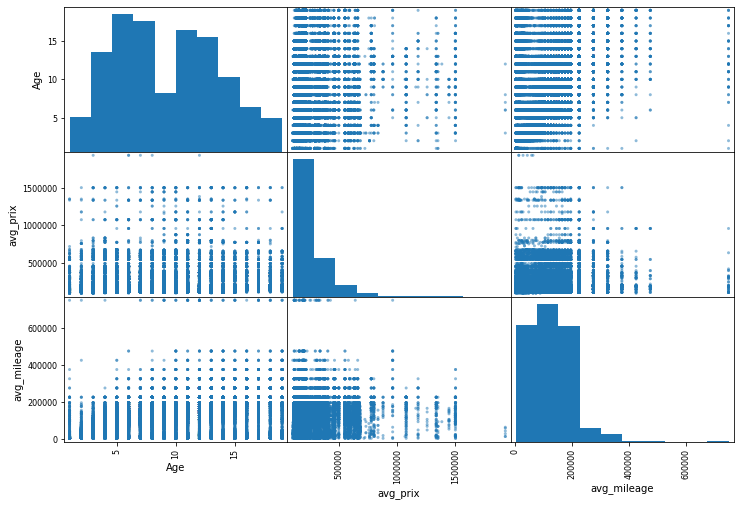

In [406]:
attributes = ['Age', 'avg_prix', 'avg_mileage']
scatter_matrix(cars[attributes], figsize=(12, 8))
plt.show()

In [410]:
cars.head()

,price,serie,Make,Fuel,Country_Make,Age,avg_prix,avg_mileage
0,295000,GIULIA,Alfa Romeo,Diesel,Italie,3,432400.0,37499.5
1,450000,GIULIA,Alfa Romeo,Diesel,Italie,1,432400.0,12499.5
2,102000,Giulietta,Alfa Romeo,Essence,Italie,10,254900.0,134999.5
3,102000,Giulietta,Alfa Romeo,Essence,Italie,10,254900.0,134999.5
4,100000,Giulietta,Alfa Romeo,Diesel,Italie,9,254900.0,224999.5


# Features and Labels

In [411]:
cars_featurs = cars.drop("price", axis=1)
cars_labels = cars["price"]

In [412]:
cars_labels =  pd.DataFrame(cars_labels, columns=['price'])
cars_labels.head()

,price
0,295000
1,450000
2,102000
3,102000
4,100000


## Scaling the Features

In [413]:
cars_cat = cars_featurs.drop(['Age', 'avg_prix', 'avg_mileage'], axis=1)
cars_num = cars_featurs.drop(['serie' ,'Make', 'Fuel', 'Country_Make'], axis=1)

In [414]:
cars_num.head()

,Age,avg_prix,avg_mileage
0,3,432400.0,37499.5
1,1,432400.0,12499.5
2,10,254900.0,134999.5
3,10,254900.0,134999.5
4,9,254900.0,224999.5


In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cars_scaled = scaler.fit_transform(cars_num)

In [416]:
cars_scaled

array([[-1.41784798,  0.9827435 , -1.03098856],
       [-1.8751295 ,  0.9827435 , -1.32953292],
       [ 0.18263735,  0.00904609,  0.13333444],
       ...,
       [ 0.18263735,  2.96634342,  0.61100542],
       [-0.04600341,  2.96634342,  0.13333444],
       [-0.73192569,  2.96634342,  0.49158768]])

In [458]:
cars_scale = pd.DataFrame(cars_scaled, columns=cars_num.columns)
cars_scale.head()

,Age,avg_prix,avg_mileage
0,-1.417848,0.982744,-1.030989
1,-1.875129,0.982744,-1.329533
2,0.182637,0.009046,0.133334
3,0.182637,0.009046,0.133334
4,-0.046003,0.009046,1.208094


In [459]:
cars_scale = cars_scale.drop("avg_prix", axis=1)

In [40]:
cat_classes = ['serie' ,'Make', 'Fuel', 'Country_Make']

### Categorical Feature Encode

In [417]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
cars_cat_1hot = encoder.fit_transform(cars_cat["Fuel"])
cars_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [418]:
len(encoder.classes_)

5

In [419]:
# fuel_df = pd.DataFrame(cars_cat_1hot, columns=encoder.classes_)

In [420]:
# res = pd.concat([fuel_df, cars_scale], axis=1)

In [421]:
# res = res.drop("avg_prix", axis=1)

In [422]:
# res.head()

In [423]:
# encoder = LabelBinarizer()
# cars_cat_1hot = encoder.fit_transform(cars_cat["Country_Make"])
# cars_cat_1hot
# make_df = pd.DataFrame(cars_cat_1hot, columns=encoder.classes_)
# res = pd.concat([res, make_df], axis=1)

## Outlier Detection

In [424]:
# housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [435]:
p1, p2 = np.percentile(car['price'], [.1, 95])
print(p1, p2)

16018.2 240000.0


In [436]:
car['price'].quantile([0.5, 0.95])

0.50     86000.0
0.95    240000.0
Name: price, dtype: float64

In [437]:
# cars_labels

### Records greater than 90% of data

In [440]:
cars_labels["price"].where(cars_labels["price"] > p2).describe()

count    1.556000e+03
mean     3.405981e+05
std      2.498299e+05
min      2.407000e+05
25%      2.650000e+05
50%      2.950000e+05
75%      3.600000e+05
max      9.100000e+06
Name: price, dtype: float64

In [441]:
cars_labels["price"].where(cars_labels["price"] < p2, p2, inplace=True)

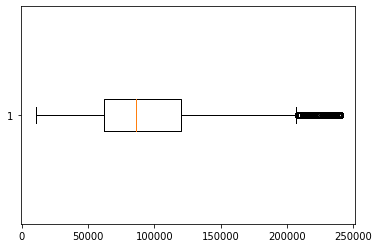

In [442]:
plt.boxplot(cars_labels['price'], vert = False)
plt.show()

# Training The model

  Car price lies on $\$$86000.0 and $240000.0 so the values must be compar with them
  
## Categorical Features 'serie' ,'Make', and 'Country_Make' is not giving accurate results for this dataset because comparing the size of the dataset the features in each category is high

In [53]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [460]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# lin_reg.fit(res, cars_labels)
scores = cross_val_score(lin_reg, cars_scale, cars_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [60889.48587997 31140.85857855 48932.28349657 31881.45628462
 52359.93315081 56249.49626565 31043.7528518  26573.40120975
 29640.21531866 58082.10940469]
Mean: 42679.299244107955
Standard deviation: 13039.765399661634


In [461]:
res.head()

,Diesel,Electrique,Essence,Hybride,LPG,Age,avg_mileage
0,1,0,0,0,0,-1.417848,-1.030989
1,1,0,0,0,0,-1.875129,-1.329533
2,0,0,1,0,0,0.182637,0.133334
3,0,0,1,0,0,0.182637,0.133334
4,1,0,0,0,0,-0.046003,1.208094


In [462]:
#Random Forest Regressior
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

scores = cross_val_score(forest_reg, cars_scale, cars_labels.values.ravel(), scoring="neg_mean_squared_error", cv=10)
rdf_scores = np.sqrt(-scores)
display_scores(rdf_scores)

Scores: [60311.43322993 32041.8324361  51467.68178886 32604.83096828
 51738.57735542 56422.07577381 31150.61212777 27464.72827134
 29965.1026229  58084.74369348]
Mean: 43125.161826787415
Standard deviation: 12787.092049851562


In [463]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(cars_scale, cars_labels.values.ravel())


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2], 'n_estima

In [464]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [452]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [453]:
cars_labels.values.ravel().shape

(32395,)

In [60]:
res.shape

(32395, 8)

In [465]:
# SVM
from sklearn.svm import SVR

svm_reg = SVR(gamma='auto', kernel='linear')
# lin_reg.fit(res, cars_labels)

scores = cross_val_score(svm_reg, cars_scale, cars_labels.values.ravel(),scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [74785.36882906 24003.38381518 25375.92678051 31241.06902799
 58945.32060029 69215.02878381 32584.40777247 21540.83602805
 42608.41465624 75451.21644538]
Mean: 45575.097273898034
Standard deviation: 20778.465544155144


In [455]:
# SVM
from sklearn.svm import SVR

svm_reg = SVR(gamma='auto', kernel='rbf')
# lin_reg.fit(res, cars_labels)

scores = cross_val_score(svm_reg, cars_scale, cars_labels.values.ravel(),scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [77920.13934259 28944.65872308 24659.88609403 35874.7827764
 61930.10329196 72599.33277686 38516.34553221 27882.15727647
 46813.60303312 79269.98611537]
Mean: 49441.09949620892
Standard deviation: 20499.748095685445


In [466]:
from sklearn.naive_bayes import GaussianNB

nb_reg = GaussianNB()
# lin_reg.fit(res, cars_labels)

scores = cross_val_score(nb_reg, cars_scale, cars_labels.values.ravel(),scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Scores: [73632.91493647 80705.00746683 90063.3385716  82508.59314805
 78030.85013666 74887.66547342 73851.05060456 69171.65184274
 64841.43740987 55163.93832834]
Mean: 74285.64479185516
Standard deviation: 9239.860784725739


### Use Following to get random forest results for the best model from above

In [64]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#put your absolute location of the csv file like "C:/Users/..../DatasetADs.csv"
def process_data(file):
    car = pd.read_csv(file)
    cars = car.drop("City", axis=1)
    cars = cars.drop("Date_ads", axis=1)
    cars = cars.drop("Year", axis=1)
    # Min, Max price -> Average Price
    cars["avg_prix"] = (cars['min_prix_neuf']+cars["max_prix_neuf"])/2
    #Dropping min, max
    cars = cars.drop("max_prix_neuf", axis=1)
    cars = cars.drop("min_prix_neuf", axis=1)
    cars["avg_mileage"] = (cars['Mileage_Min']+cars["Mileage_Max"])/2
    #Dropping min, max
    cars = cars.drop("Mileage_Min", axis=1)
    cars = cars.drop("Mileage_Max", axis=1)
    cars_featurs = cars.drop("price", axis=1)
    cars_labels = cars["price"]
    cars_labels =  pd.DataFrame(cars_labels, columns=['price'])
    cars_cat = cars_featurs.drop(['Age', 'avg_prix', 'avg_mileage'], axis=1)
    cars_num = cars_featurs.drop(['serie' ,'Make', 'Fuel', 'Country_Make'], axis=1)
    scaler = StandardScaler()
    cars_scaled = scaler.fit_transform(cars_num)
    cars_scale = pd.DataFrame(cars_scaled, columns=cars_num.columns)
    encoder = LabelBinarizer()
    cars_cat_1hot = encoder.fit_transform(cars_cat["Fuel"])
    fuel_df = pd.DataFrame(cars_cat_1hot, columns=encoder.classes_)
    res = pd.concat([fuel_df, cars_scale], axis=1)
    p1, p2 = np.percentile(car['price'], [.1, 95])
    cars_labels["price"].where(cars_labels["price"] < p2, p2, inplace=True)
    
    return res, cars_labels


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def random_forest_values(res, cars_labels):
    forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

    scores = cross_val_score(forest_reg, res, cars_labels.values.ravel(), scoring="neg_mean_squared_error", cv=10)
    rdf_scores = np.sqrt(-scores)
    display_scores(rdf_scores)
    


In [65]:
# Example
# use absolute path like C:/Users/PC/Desktop/.../DatasetADs.csv if you have dataset in another directory
res, cars_labels = process_data("DatasetADs.csv")
random_forest_values(res, cars_labels)

Scores: [27537.73120752 16974.27887871 15696.82374726 20268.84884715
 22368.53838188 27971.21473105 21694.65256948 18410.07085884
 23771.19720919 37938.99064566]
Mean: 23263.234707672458
Standard deviation: 6234.21408188423


# Exponential (Log) regression

#### As we know make has 11 values so first it should be encoded

## Exponential Function
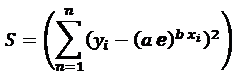

In [66]:
# calculate geometric mean
from scipy import stats

In [67]:
def resiprocal(y, x, a, b):
    s = (y - (a*np.exp(b*x)))**2

In [86]:
# Lets take the first initial dataset
car.head()

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
0,Casablanca,35000,39999,295000,GIULIA,Alfa Romeo,4/3/2019,Diesel,2017,Italie,369900,494900,3
1,Casablanca,10000,14999,450000,GIULIA,Alfa Romeo,7/7/2019,Diesel,2019,Italie,369900,494900,1
2,Mohammedia,130000,139999,102000,Giulietta,Alfa Romeo,7/27/2019,Essence,2010,Italie,229900,279900,10
3,Mohammedia,130000,139999,102000,Giulietta,Alfa Romeo,7/27/2019,Essence,2010,Italie,229900,279900,10
4,Casablanca,200000,249999,100000,Giulietta,Alfa Romeo,7/8/2019,Diesel,2011,Italie,229900,279900,9


In [135]:
df = car.where(car['price'] <  500000).dropna()

In [136]:
# remove missing values
df = df.dropna()

In [137]:
df.head()

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
0,Casablanca,35000.0,39999.0,295000.0,GIULIA,Alfa Romeo,4/3/2019,Diesel,2017.0,Italie,369900.0,494900.0,3.0
1,Casablanca,10000.0,14999.0,450000.0,GIULIA,Alfa Romeo,7/7/2019,Diesel,2019.0,Italie,369900.0,494900.0,1.0
2,Mohammedia,130000.0,139999.0,102000.0,Giulietta,Alfa Romeo,7/27/2019,Essence,2010.0,Italie,229900.0,279900.0,10.0
3,Mohammedia,130000.0,139999.0,102000.0,Giulietta,Alfa Romeo,7/27/2019,Essence,2010.0,Italie,229900.0,279900.0,10.0
4,Casablanca,200000.0,249999.0,100000.0,Giulietta,Alfa Romeo,7/8/2019,Diesel,2011.0,Italie,229900.0,279900.0,9.0


In [140]:
df.describe()

,Mileage_Min,Mileage_Max,price,Year,min_prix_neuf,max_prix_neuf,Age
count,32278.000000,32278.000000,32278.000000,32278.000000,3.227800e+04,3.227800e+04,32278.000000
mean,116837.164632,131350.851230,103249.288835,2010.780222,2.140060e+05,2.875323e+05,9.219778
std,75711.004580,92757.711069,62545.513175,4.366724,1.412870e+05,2.145169e+05,4.366724
min,0.000000,4999.000000,10500.000000,2001.000000,9.790000e+04,9.990000e+04,1.000000
25%,60000.000000,64999.000000,61000.000000,2008.000000,1.247000e+05,1.711000e+05,6.000000
50%,110000.000000,119999.000000,86000.000000,2011.000000,1.610000e+05,2.199000e+05,9.000000
75%,170000.000000,179999.000000,120000.000000,2014.000000,2.700000e+05,3.290000e+05,12.000000
max,500000.000000,1000000.000000,495000.000000,2019.000000,1.304000e+06,2.660000e+06,19.000000


In [141]:
# stats.gmean(df["price_lg"])

In [538]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf


In [539]:
dfs = df.filter(['Make', 'serie', 'Age', 'Mileage_Min', 'Mileage_Max', 'Fuel', "price"], axis=1)
# med_num = med.filter(['IPSI','Contra'], axis=1)

## Model by make

In [541]:
results = smf.ols('np.log(price) ~ Make + Fuel + np.log(Mileage_Max) + np.log(Age) ', data= dfs).fit()

In [542]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2375.
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:16:39   Log-Likelihood:                -3384.8
No. Observations:               32278   AIC:                             6840.
Df Residuals:                   32243   BIC:                             7133.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.5365      0.032    388.500      0.000      12.473      12.600
Make[T.Audi]              0.3160      0.028     11.157      0.000       0.260       0.372
Make[T.BMW]               0.2572      0.029      9.006      0.000       0.201       0.313
Make[T.Citroen]          -0.3980      0.028    -14.309      0.000      -0.452      -0.343
Make[T.Dacia]            -0.5263      0.027    -19.285      0.000      -0.580      -0.473
Make[T.Fiat]             -0.4766      0.028    -16.937      0.000      -0.532      -0.421
Make[T.Ford]             -0.2493      0.028     -8.904      0.000      -0.304      -0.194
Make[T.Honda]            -0.1078      0.029     -3.759      0.000      -0.164      -0.052
Make[T.Hyundai]          -0.2819      0.028    -10.195      0.000      -0.336      -0.228
Make[T.Jaguar]            0.5018      0.049     10.218      0.000       0.406       0.598
Make[T.Jeep]              0.1433      0.035      4.103      0.000       0.075       0.212
Make[T.Kia]              -0.3229      0.028    -11.407      0.000      -0.378      -0.267
Make[T.Land Rover]        0.5394      0.031     17.166      0.000       0.478       0.601
Make[T.Lexus]             0.2652      0.192      1.381      0.167      -0.111       0.642
Make[T.Mazda]            -0.1833      0.042     -4.336      0.000      -0.266      -0.100
Make[T.Mercedes-Benz]     0.3354      0.028     11.868      0.000       0.280       0.391
Make[T.Mitsubishi]       -0.2288      0.036     -6.295      0.000      -0.300      -0.158
Make[T.Nissan]           -0.0757      0.030     -2.558      0.011      -0.134      -0.018
Make[T.Opel]             -0.1986      0.029     -6.877      0.000      -0.255      -0.142
Make[T.Peugeot]          -0.4225      0.028    -15.343      0.000      -0.477      -0.369
Make[T.Porsche]           0.7878      0.042     18.885      0.000       0.706       0.870
Make[T.Renault]          -0.3463      0.027    -12.683      0.000      -0.400      -0.293
Make[T.Seat]             -0.2190      0.030     -7.304      0.000      -0.278      -0.160
Make[T.Skoda]            -0.1151      0.032     -3.588      0.000      -0.178      -0.052
Make[T.Ssangyong]        -0.3930      0.036    -11.051      0.000      -0.463      -0.323
Make[T.Toyota]           -0.1959      0.028     -6.925      0.000      -0.251      -0.140
Make[T.Volkswagen]        0.0402      0.027      1.467      0.142      -0.014       0.094
Make[T.Volvo]             0.1179      0.037      3.223      0.001       0.046       0.190
Make[T.mini]              0.2052      0.058      3.515      0.000       0.091       0.320
Fuel[T.Electrique]       -0.6238      0.072     -8.672      0.000      -0.765      -0.483
Fuel[T.Essence]          -0.3551      0.004    -83.737      0.000      -0.363      -0.347
Fuel[T.Hybride]        

### Equation

#### pred(price) = exp(6.1602+[Audi]*-0.0347+[BMW]*-0.1915+[Citroen]*-0.2914+[Dacia]*-0.1787+[Fiat]*-0.2738+[Ford]*-0.1831+[Honda]*-0.3703+[Hyundai]*-0.2666+[Jaguar]*-0.0616+[Jeep]*-0.1848+[Kia]*-0.3395+[LandRover]*-0.0912+[Lexus]*-0.7343+[Mazda]*-0.4781+[Mercedes-Benz]*-0.0579+[Mitsubishi]*-0.2992+[Nissan]*-0.1592+[Opel]*-0.0803+[Peugeot]*-0.2907+[Porsche]*-0.2965+[Renault]*-0.1572+[Seat]*-0.0616+[Skoda]*-0.1024+[Ssangyong]*-0.4025+[Toyota]*-0.1741+[Volkswagen]*-0.0333+[Volvo]*-0.1694+[mini]*-0.1087+[min_prix_neuf]*0.1140+[Mileage_Max]*0.0182+[max_prix_neuf]*0.4003+[Age]*-0.5408)

In [258]:
np.exp(results.predict(car.iloc[3:4])).values[0]

104700.72620675308

In [259]:
car.iloc[3:4]

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
3,Mohammedia,130000,139999,102000,Giulietta,Alfa Romeo,7/27/2019,Essence,2010,Italie,229900,279900,10


In [260]:
pred_df_make = pd.DataFrame(np.exp(results.predict(df)), columns=["pred_price"])

In [261]:
pred_price_df = pd.concat([pred_df_make, df["price"]], axis=1)

In [262]:
pred_price_df.head()

,pred_price,price
0,260264.105589,295000.0
1,463091.549046,450000.0
2,104700.726207,102000.0
3,104700.726207,102000.0
4,112018.237466,100000.0


#### MAE

In [319]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df["price"], pred_df_make)

20510.763083448437

## For prediction use `np.exp(results.predict(data)` formula

In [322]:
# example
# if you want to predict cars 3 rd record
np.exp(results.predict(car.iloc[3:4]))

3    104700.726207
dtype: float64

In [324]:
# if you want to predict cars 100 - 110 records
np.exp(results.predict(car.iloc[100:110]))

100    86641.614503
101    87207.214743
102    86852.932711
103    90668.173960
104    93039.576876
105    88666.404510
106    88306.186418
107    95960.419719
108    95690.947047
109    95960.419719
dtype: float64

In [284]:
def predict_by_make(data):
    print("Make: Pred(price): $ {:.2f}".format(np.exp(results.predict(data)).values[0]))

### Give the dataframe record as data to predict new price

In [505]:
predict_by_make(car.iloc[3:4])

Make: Pred(price): $ 104700.73


In [507]:
df.head()

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
0,Casablanca,35000.0,39999.0,295000.0,GIULIA,Alfa Romeo,4/3/2019,Diesel,2017.0,Italie,369900.0,494900.0,3.0
1,Casablanca,10000.0,14999.0,450000.0,GIULIA,Alfa Romeo,7/7/2019,Diesel,2019.0,Italie,369900.0,494900.0,1.0
2,Mohammedia,130000.0,139999.0,102000.0,Giulietta,Alfa Romeo,7/27/2019,Essence,2010.0,Italie,229900.0,279900.0,10.0
3,Mohammedia,130000.0,139999.0,102000.0,Giulietta,Alfa Romeo,7/27/2019,Essence,2010.0,Italie,229900.0,279900.0,10.0
4,Casablanca,200000.0,249999.0,100000.0,Giulietta,Alfa Romeo,7/8/2019,Diesel,2011.0,Italie,229900.0,279900.0,9.0


In [518]:
dfs = df.filter(['Make', 'serie', 'Age', 'Mileage_Min', 'Mileage_Max', 'Fuel', "price"], axis=1)
# med_num = med.filter(['IPSI','Contra'], axis=1)

In [519]:
dfs.head()

,Make,serie,Age,Mileage_Min,Mileage_Max,Fuel,price
0,Alfa Romeo,GIULIA,3.0,35000.0,39999.0,Diesel,295000.0
1,Alfa Romeo,GIULIA,1.0,10000.0,14999.0,Diesel,450000.0
2,Alfa Romeo,Giulietta,10.0,130000.0,139999.0,Essence,102000.0
3,Alfa Romeo,Giulietta,10.0,130000.0,139999.0,Essence,102000.0
4,Alfa Romeo,Giulietta,9.0,200000.0,249999.0,Diesel,100000.0


## marque	Serie	age	mileage_min	mileage_Max	type

## Model by model

In [552]:
results_model = smf.ols('np.log(price) ~ serie +  Fuel +np.log(Mileage_Max)  + np.log(Age) ', data=dfs).fit()

In [553]:
results_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     723.0
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:19:02   Log-Likelihood:                 2882.9
No. Observations:               32278   AIC:                            -5394.
Df Residuals:                   32092   BIC:                            -3835.
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      11.9681      0.052    231.980      0.000      11.867      12.069
serie[T.2008]                   0.2685      0.056      4.828      0.000       0.159       0.377
serie[T.208]                    0.0942      0.051      1.840      0.066      -0.006       0.195
serie[T.3]                      0.2893      0.062      4.668      0.000       0.168       0.411
serie[T.3008]                   0.5858      0.057     10.317      0.000       0.474       0.697
serie[T.301]                    0.0774      0.052      1.500      0.134      -0.024       0.179
serie[T.308]                    0.3730      0.051      7.322      0.000       0.273       0.473
serie[T.500]                    0.3404      0.052      6.509      0.000       0.238       0.443
serie[T.5008]                   0.3568      0.068      5.249      0.000       0.224       0.490
serie[T.500C]                   0.2153      0.083      2.584      0.010       0.052       0.379
serie[T.500X]                   0.3874      0.075      5.200      0.000       0.241       0.533
serie[T.508]                    0.5002      0.053      9.479      0.000       0.397       0.604
serie[T.6]                      0.3888      0.063      6.139      0.000       0.265       0.513
serie[T.911 Carrera]            0.8445      0.165      5.131      0.000       0.522       1.167
serie[T.A3]                     0.7741      0.051     15.056      0.000       0.673       0.875
serie[T.A4]                     0.7275      0.052     14.003      0.000       0.626       0.829
serie[T.A5]                     1.1540      0.055     21.029      0.000       1.046       1.262
serie[T.A6]                     0.8528      0.055     15.572      0.000       0.745       0.960
serie[T.A8]                     0.7316      0.077      9.452      0.000       0.580       0.883
serie[T.ADAM]                   0.4002      0.077      5.175      0.000       0.249       0.552
serie[T.Accent]                 0.1224      0.051      2.419      0.016       0.023       0.222
serie[T.Accord]                 0.4199      0.051      8.211      0.000       0.320       0.520
serie[T.Astra]                  0.4129      0.051      8.100      0.000       0.313       0.513
serie[T.Auris]                  0.4420      0.055      8.019      0.000       0.334       0.550
serie[T.Berlingo]               0.1631      0.050      3.240      0.001       0.064       0.262
serie[T.Boxster]                1.9069      0.165     11.583      0.000       1.584       2.230
serie[T.C-ELYSEE]               0.0585      0.069      0.853      0.394      -0.076       0.193
serie[T.C-Elysée]               0.0654      0.058      1.132      0.258      -0.048       0.179
serie[T.C-Max]                  0.5555      0.055     10.068      0.000       0.447       0.664
serie[T.C1]

In [525]:
np.exp(results_model.predict(car.iloc[3:4])).values[0]

85880.66479234594

In [526]:
pred_df_model = pd.DataFrame(np.exp(results_model.predict(df)), columns=["pred_price"])

In [527]:
pred_price_model_df = pd.concat([pred_df_make, df["price"]], axis=1)

In [528]:
pred_price_model_df.head()

,pred_price,price
0,260264.105589,295000.0
1,463091.549046,450000.0
2,104700.726207,102000.0
3,104700.726207,102000.0
4,112018.237466,100000.0


### MAE

In [279]:
mean_absolute_error(df["price"], pred_df_model)

17557.510666383598

In [302]:
def predict_by_model(data):
    
    print("Model: Pred(price): $ {:.2f}".format(np.exp(results.predict(data)).values[0]))

### Give the dataframe record as data to predict new price

In [287]:
# data = input just like original datframe record
car.iloc[3:4]

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
3,Mohammedia,130000,139999,102000,Giulietta,Alfa Romeo,7/27/2019,Essence,2010,Italie,229900,279900,10


In [288]:
predict_by_model(car.iloc[3:4])

Model: Pred(price): $ 104700.73


### Examples

In [291]:
predict_by_model(car.iloc[3:4])
predict_by_make(car.iloc[3:4])

Model: Pred(price): $ 104700.73
Make: Pred(price): $ 104700.73


In [292]:
 # actual price 
car.iloc[3:4]["price"]

3    102000
Name: price, dtype: int64

In [290]:
predict_by_model(car.iloc[567:568])
predict_by_make(car.iloc[567:568])

Model: Pred(price): $ 155664.75
Make: Pred(price): $ 155664.75


In [293]:
 # actual price 
car.iloc[567:568]["price"]

567    180000
Name: price, dtype: int64

In [308]:
predict_by_model(car.iloc[15000:15001])
predict_by_make(car.iloc[15000:15001])

Model: Pred(price): $ 46380.49
Make: Pred(price): $ 46380.49


In [309]:
car.iloc[15000:15001]

,City,Mileage_Min,Mileage_Max,price,serie,Make,Date_ads,Fuel,Year,Country_Make,min_prix_neuf,max_prix_neuf,Age
15000,Marrakech,140000,149999,47000,Picanto,Kia,1/11/2019,Essence,2007,Corée du sud,109900,149900,13


In [310]:
 # actual price 
car.iloc[15000:15001]["price"]

15000    47000
Name: price, dtype: int64

########################################################

In [330]:
out_df = pd.read_csv("Out_Data.csv")

In [358]:
res.head()

,Diesel,Electrique,Essence,Hybride,LPG,Age,avg_mileage
0,1,0,0,0,0,-1.417848,-1.030989
1,1,0,0,0,0,-1.875129,-1.329533
2,0,0,1,0,0,0.182637,0.133334
3,0,0,1,0,0,0.182637,0.133334
4,1,0,0,0,0,-0.046003,1.208094


In [343]:
out_df.head()

,marque,Serie,age,mileage_min,mileage_Max,type
0,Alfa Romeo,GIULIA,1,0,5000,Diesel
1,Alfa Romeo,GIULIA,2,0,5000,Diesel
2,Alfa Romeo,GIULIA,3,0,5000,Diesel
3,Alfa Romeo,GIULIA,4,0,5000,Diesel
4,Alfa Romeo,GIULIA,5,0,5000,Diesel


In [367]:
X = out_df.drop("marque", axis=1)
X = X.drop("Serie", axis=1)
X = X.drop("type", axis=1)

In [368]:
X["avg_mileage"] = (X["mileage_Max"]+ X["mileage_min"])/2

In [369]:
X = X.drop("mileage_min", axis=1)
X = X.drop("mileage_Max", axis=1)

In [371]:
X.head()

,age,avg_mileage
0,1,2500.0
1,2,2500.0
2,3,2500.0
3,4,2500.0
4,5,2500.0


In [372]:
scaler = StandardScaler()
cars_scaled = scaler.fit_transform(X)
X = pd.DataFrame(cars_scaled, columns=X.columns)
X.head()

,age,avg_mileage
0,-1.643168,-0.927967
1,-1.460593,-0.927967
2,-1.278019,-0.927967
3,-1.095445,-0.927967
4,-0.912871,-0.927967


In [467]:
cars_scale.head()

,Age,avg_mileage
0,-1.417848,-1.030989
1,-1.875129,-1.329533
2,0.182637,0.133334
3,0.182637,0.133334
4,-0.046003,1.208094


In [475]:
lin_reg.fit(cars_scale, cars_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [476]:
lin_pred = lin_reg.predict(X)

In [477]:
forest_reg.fit(cars_scale, cars_labels)
forest_pred  = forest_reg.predict(X)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [494]:
svm_reg.fit(cars_scale, cars_labels)
svm_pred  = svm_reg.predict(X)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [495]:
nb_reg.fit(cars_scale, cars_labels)
nb_pred  = nb_reg.predict(X)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [496]:
lin_pred_df = pd.DataFrame(lin_pred, columns=["Linear Regression"])
forest_pred_df = pd.DataFrame(forest_pred, columns=["Random Forest Regressior"])
svm_pred_df = pd.DataFrame(svm_pred, columns=["SVM"])
nb_pred_df = pd.DataFrame(nb_pred, columns=["naive_bayes"])

In [497]:
pred_df = pd.concat([lin_pred_df, forest_pred_df, svm_pred_df, nb_pred_df], axis=1)

In [530]:
pred_df.to_csv('pred.csv')

In [533]:
out_df = out_df.rename(columns={"marque" : "Make", "Serie": "serie", "age": "Age", "mileage_min": "Mileage_Min", "mileage_Max": "Mileage_Max", "type": "Fuel"})

In [535]:
out_df.head()

,Make,serie,Age,Mileage_Min,Mileage_Max,Fuel
0,Alfa Romeo,GIULIA,1,0,5000,Diesel
1,Alfa Romeo,GIULIA,2,0,5000,Diesel
2,Alfa Romeo,GIULIA,3,0,5000,Diesel
3,Alfa Romeo,GIULIA,4,0,5000,Diesel
4,Alfa Romeo,GIULIA,5,0,5000,Diesel


In [649]:
dfs.head()

,Make,serie,Age,Mileage_Min,Mileage_Max,Fuel,price
0,Alfa Romeo,GIULIA,3.0,35000.0,39999.0,Diesel,295000.0
1,Alfa Romeo,GIULIA,1.0,10000.0,14999.0,Diesel,450000.0
2,Alfa Romeo,Giulietta,10.0,130000.0,139999.0,Essence,102000.0
3,Alfa Romeo,Giulietta,10.0,130000.0,139999.0,Essence,102000.0
4,Alfa Romeo,Giulietta,9.0,200000.0,249999.0,Diesel,100000.0


In [666]:
out_df['serie'] = out_df['serie'].replace(['F-PACE'],'F-Type')

In [668]:
out_df['Make'] = out_df['Make'].replace(['Chery'],'Citroen')

In [677]:
pred_model_df = pd.DataFrame(np.exp(results_model.predict(out_df)), columns=["Log-linear By Model"])

In [678]:
pred_series_df =  pd.DataFrame(np.exp(results.predict(out_df)), columns=["Log-linear By Make"])

In [679]:
pred_df = pd.concat([lin_pred_df, forest_pred_df, svm_pred_df, nb_pred_df, pred_series_df, pred_model_df], axis=1)

In [680]:
pred_df.to_csv('pred.csv')

In [634]:
dfs['serie'].unique()

array(['GIULIA', 'Giulietta', 'A3', 'A4', 'A5', 'A6', 'A8', 'Q3', 'Q5',
       'Q7', 'TT', 'Serie 1', 'SERIE 2', 'Serie 3', 'SERIE 3 GT',
       'Serie 4', 'Serie 5', 'Serie 7', 'X1', 'X3', 'X4', 'X5', 'X6',
       'Berlingo', 'C1', 'C3', 'C4 CACTUS', 'C4 Picasso', 'C5',
       'C-ELYSEE', 'C-Elysée', 'Dokker', 'Dokker Van', 'Duster', 'Lodgy',
       'Logan', 'Logan Mcv', 'Sandero', 'DS3', 'DS4', 'DS5', '500',
       '500C', '500X', 'Doblo', 'FIORINO', 'Panda', 'Pinto', 'Punto',
       'TIPO', 'C-Max', 'Fiesta', 'Fusion', 'Kuga', 'Mustang', 'Accord',
       'Civic', 'CR-V', 'HR-V', 'Jazz', 'Accent', 'CRETA', 'Elantra',
       'i 10', 'i 20', 'i 30', 'Santa Fe', 'Tucson', 'F-Type', 'XE', 'XF',
       'XJ', 'Cherokee', 'Compass', 'Grand Cherokee', 'Renegade',
       'Wrangler', 'Ceed', 'Picanto', 'Sorento', 'Sportage', 'Discovery',
       'Discovery Sport', 'Range Rover', 'Range Rover Evoque',
       'Range Rover Sport', 'Velar', 'LS', 'RX', '3', '6', 'CX-3',
       'Classe CL', 'Classe 

In [635]:
out_df['serie'].unique()

array(['GIULIA', 'Giulietta', 'A3', 'A4', 'A5', 'A6', 'A8', 'Q3', 'Q5',
       'Q7', 'TT', 'Serie 1', 'SERIE 2', 'Serie 3', 'SERIE 3 GT',
       'Serie 4', 'Serie 5', 'Serie 7', 'X1', 'X3', 'X4', 'X5', 'X6',
       'Berlingo', 'C1', 'C3', 'C4 CACTUS', 'C4 Picasso', 'C5',
       'C-ELYSEE', 'C-Elysée', 'DS3', 'DS4', 'DS5', 'Dokker',
       'Dokker Van', 'Duster', 'Lodgy', 'Logan', 'Logan Mcv', 'Sandero',
       '500', '500C', '500X', 'Doblo', 'FIORINO', 'Panda', 'Pinto',
       'Punto', 'TIPO', 'C-Max', 'Fiesta', 'Fusion', 'Kuga', 'Mustang',
       'Accent', 'Accord', 'Civic', 'CR-V', 'HR-V', 'Jazz', 'CRETA',
       'Elantra', 'i 10', 'i 20', 'i 30', 'Santa Fe', 'Tucson', 'F-PACE',
       'F-Type', 'XE', 'XF', 'XJ', 'Cherokee', 'Compass',
       'Grand Cherokee', 'Renegade', 'Wrangler', 'Ceed', 'Picanto',
       'Sorento', 'Sportage', 'Discovery', 'Discovery Sport',
       'Range Rover', 'Range Rover Evoque', 'Range Rover Sport', 'Velar',
       'LS', 'RX', '3', '6', 'CX-3', 'Classe A',

In [644]:
a = out_df['serie'].unique()

In [645]:
b = dfs['serie'].unique()

In [646]:
b = np.append(b, "z")

In [647]:
b.shape

(181,)

In [661]:
for i in range(len(a)):
    if a[i] not in b:
        print(a[i])

In [664]:
out_df['Make'].unique()

array(['Alfa Romeo', 'Audi', 'BMW', 'Chery', 'Citroen', 'Dacia', 'Fiat',
       'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Mazda', 'Mercedes-Benz', 'mini', 'Mitsubishi', 'Nissan',
       'Opel', 'Peugeot', 'Porsche', 'Renault', 'Seat', 'Skoda',
       'Ssangyong', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [665]:
dfs['Make'].unique()

array(['Alfa Romeo', 'Audi', 'BMW', 'Citroen', 'Dacia', 'Fiat', 'Ford',
       'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus',
       'Mazda', 'Mercedes-Benz', 'mini', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Porsche', 'Renault', 'Seat', 'Skoda', 'Ssangyong',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [658]:
c = out_df['Make'].unique()
d = dfs['Make'].unique()

In [660]:
for i in range(len(c)):
    if c[i] not in d:
        print(c[i])

Chery
